In [87]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.linear_model import LinearRegression,ElasticNetCV,ElasticNet
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
df=df.drop(["Serial No."],axis=1)
df

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
495              0.87  
496              0.96  
497              0.93  
498              0.73  
499              0.84  

[500 rows x 8 columns]

In [3]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

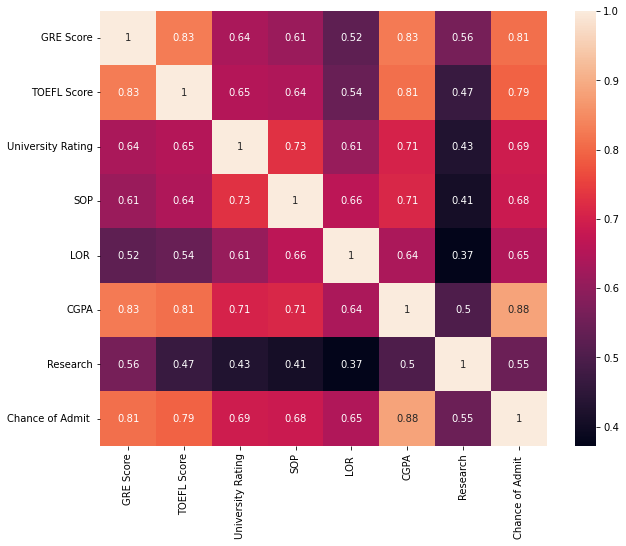

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [5]:
x=df.drop(["Chance of Admit "],axis=1)
y=df["Chance of Admit "]

In [65]:
x

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]

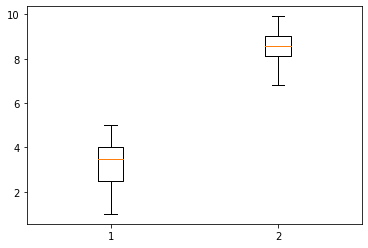

In [66]:
#outlier
fig,ax=plt.subplots()
ax.boxplot(x[['SOP','CGPA']])
plt.show()

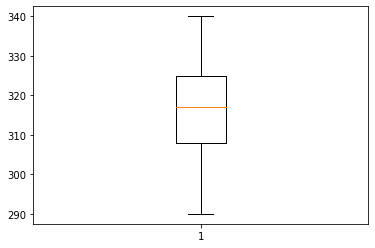

In [63]:
fig,ax=plt.subplots()
ax.boxplot(x['GRE Score'])
plt.show()

In [19]:
#one of the way to find outlier below 10 vif is best 
vif_df =pd.DataFrame()
vif_df['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif_df['feature']=x.columns
vif_df

vif            feature
0  1308.061089          GRE Score
1  1215.951898        TOEFL Score
2    20.933361  University Rating
3    35.265006                SOP
4    30.911476               LOR 
5   950.817985               CGPA
6     2.869493           Research

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
lr.score(x_train,y_train)

0.8132510822066584

In [86]:
lr.score(x_test,y_test)

0.8355717634850115

In [32]:
df1=pd.read_csv("Admission_Predict.csv")
X=df1.drop(["Serial No.","Chance of Admit "],axis=1)
Y=df1["Chance of Admit "]

In [33]:
lr.score(X,Y)

0.8016545174692062

In [99]:
x.shape[1]

7

In [117]:
# for score which is R2 :- 1-(rss/tss)
#checking for score with adjusted r2
def adj_r2(x,y):
    r2=lr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjust_r2=(1-r2)*(n-1)/(n-p-1)
    return (1-adjust_r2)*100
adj_r2(x,y)

81.76873383368216

In [39]:
#checking the model is stable or not 
elastic= ElasticNetCV(cv=10, normalize=True)
elastic.fit(x_train,y_train)
elastic.alpha_

6.0831266306116815e-05

In [40]:
elastic.l1_ratio_

0.5

In [41]:
elastic_lr= ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio_)

In [42]:
elastic_lr.fit(x_train,y_train)

ElasticNet(alpha=6.0831266306116815e-05)

In [43]:
elastic_lr.score(x_test,y_test)

0.8357229251236598

In [100]:
#scalar
from sklearn.preprocessing import StandardScaler

In [108]:
scalar=StandardScaler()
new_sc=scalar.fit_transform(df)
new_df=pd.DataFrame(new_sc)
new_df.columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research','Chance of Admit']
ProfileReport(new_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [111]:
X=new_df.drop(["Chance of Admit"],axis=1)
Y=new_df["Chance of Admit"]

In [112]:
#one of the way to find outlier below 10 vif is best 
vif_df =pd.DataFrame()
vif_df['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif_df['feature']=X.columns
vif_df

vif            feature
0  4.464249          GRE Score
1  3.904213        TOEFL Score
2  2.621036  University Rating
3  2.835210                SOP
4  2.033555               LOR 
5  4.777992               CGPA
6  1.494008           Research

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
Lr=LinearRegression()
Lr.fit(X_train,Y_train)

LinearRegression()

In [115]:
Lr.score(X_train,Y_train)

0.8132510822066584

In [116]:
Lr.score(X_test,Y_test)

0.8355717634850118

In [121]:
#checking for score with adjusted r2
def sc_adj_r2(X,Y):
    r2=lr.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjust_r2=(1-r2)*(n-1)/(n-p-1)
    return (1-adjust_r2)*100
sc_adj_r2(X,Y)

81.76873383368216